# 02_host_virus_assoc_summary

This document quantifies how many viruses are connected to hosts, looks at strong vs weak linkages, and visualizes the number of viral copies per cell. 

## Load packages and data

In [76]:
# Load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# from 01_create_proximeta_associations_table:
vmag_assoc = pd.read_csv(op.join(path, 'tables/proximeta_associations_table.csv'))

# load vMAG data
jv119_vmag_sum = pd.read_csv(op.join(path,'data/proximeta_viral_files/jv-119_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv121_vmag_sum = pd.read_csv(op.join(path,'data/proximeta_viral_files/jv-121_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv132_vmag_sum = pd.read_csv(op.join(path,'data/proximeta_viral_files/jv-132_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')
jv154_vmag_sum = pd.read_csv(op.join(path, 'data/proximeta_viral_files/jv-119_proximeta/viral_MAGs/viral_mags_summary.tsv'), sep = '\t')

# load SAG data
sag_sum = pd.read_csv(op.join(path,'data/sag_data/MPvsag_info_230818.csv'))
sag_gtdb = pd.read_csv(op.join(path,'data/sag_data/MPsag_mx2_proximeta_matches_gtdbtk.csv'))

## How many MAGs are connected to viral contigs/vMAGs?

### How many per sample?

In [77]:
# subset vmag_assoc by contig virus_type, group by sample_name, and count the number of viruses per sample
vmag_assoc[vmag_assoc['virus_type'] == 'contig'].groupby('sample_name', as_index=False)['virus_name'].count()

,sample_name,virus_name
0,JV119,90
1,JV121,77
2,JV132,81
3,JV154,47


In [78]:
# subset vmag_assoc by vMAG virus_type, group by sample, and count the number of viruses per sample
vmag_assoc[vmag_assoc['virus_type'] == 'vMAG'].groupby('sample_name', as_index=False)['virus_name'].count()

,sample_name,virus_name
0,JV119,7
1,JV121,10
2,JV132,15
3,JV154,9


### How many total?

In [79]:
# group vmag_assoc by virus_type and count the number of viruses per each virus_type
vmag_assoc.groupby('virus_type', as_index=False)['virus_name'].count()

,virus_type,virus_name
0,contig,295
1,vMAG,41


## Plots- Distribution of adjusted_inter_vs_intra_ratio 

In [80]:
# each data frame is created by grouping vmag_assoc by sample_name and virus_type and getting the group corresponding to that data frame

jv119_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'contig'))
jv119_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'vMAG'))

jv121_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'contig'))
jv121_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'vMAG'))

jv132_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'contig'))
jv132_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'vMAG'))

jv154_contig = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'contig'))
jv154_vMAG = vmag_assoc.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'vMAG'))

Text(0.5, 0.98, 'JV119 Distribution of the Inter vs Intra Ratio')

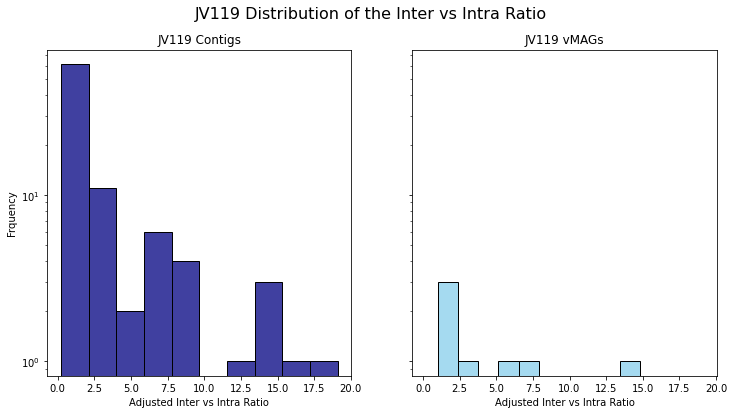

In [81]:
# create a figure of size (12,6) with 1 row and 2 columns of subplots that share the same x and y axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

# create a histogram of the adjusted_inter_vs_intra_ratio column of the jv119_contig data frame as the first subplot with 10 bins, color fill is navy, and the outline color is black
sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='navy', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio') # create x-axis label
axes[0].set_ylabel('Frquency') # create y-axis label
axes[0].set_title('JV119 Contigs') # create plot title
axes[0].set_yscale('log') # set the scale of the y-axis to log scale

# create a histogram of the adjusted_inter_vs_intra_ratio column of the jv119_contig data frame as the second subplot with 10 bins, color fill is skyblue, and the outline color is black
sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='skyblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio') # create x-axis label
axes[1].set_ylabel('Frquency') # create x-axis label
axes[1].set_title('JV119 vMAGs') # create plot title
axes[1].set_yscale('log') # set the scale of the y-axis to log scale

# create figure title
fig.suptitle('JV119 Distribution of the Inter vs Intra Ratio',fontsize=16)

Text(0.5, 0.98, 'JV121 Distribution of the Inter vs Intra Ratio')

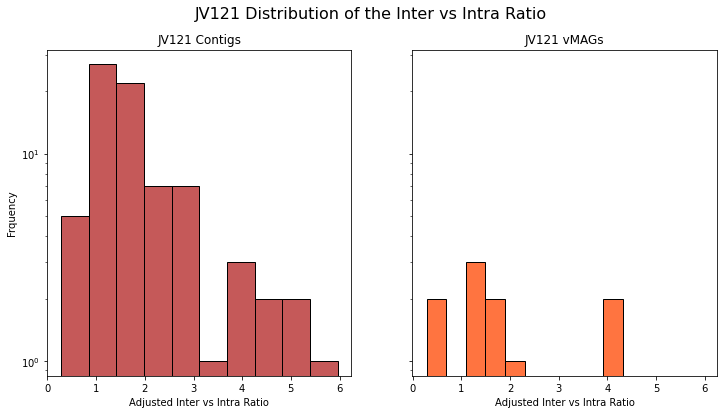

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='firebrick', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV121 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='orangered', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV121 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV121 Distribution of the Inter vs Intra Ratio',fontsize=16)

Text(0.5, 0.98, 'JV132 Distribution of the Inter vs Intra Ratio')

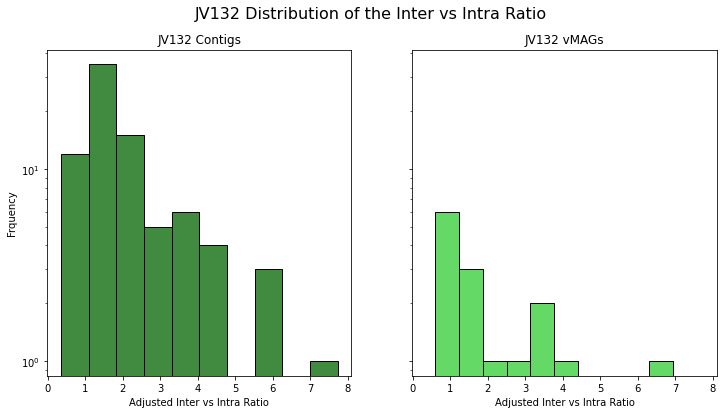

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='darkgreen', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV132 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='limegreen', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV132 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV132 Distribution of the Inter vs Intra Ratio',fontsize=16)

Text(0.5, 0.98, 'JV154 Distribution of the Inter vs Intra Ratio')

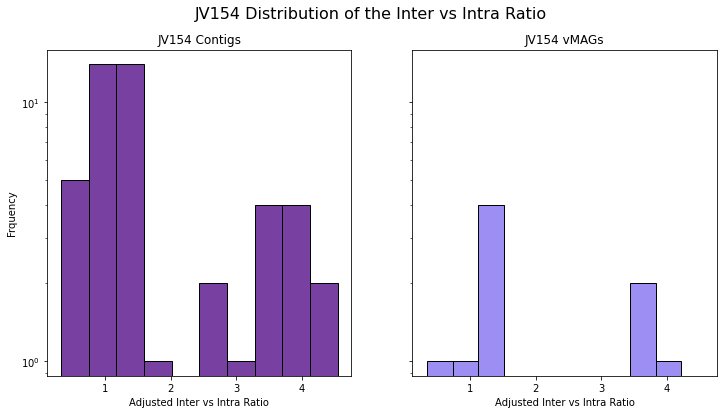

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0], bins=10, color='indigo', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV154 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'], bins=10, color='mediumslateblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV154 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV154 Distribution of the Inter vs Intra Ratio',fontsize=16)

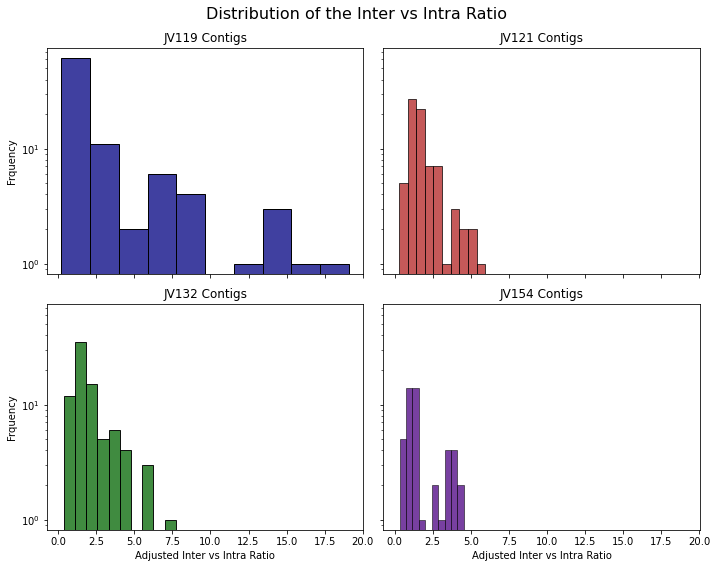

In [85]:
# plot all contigs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 Contigs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 Contigs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 Contigs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout() # minimize white space in figure

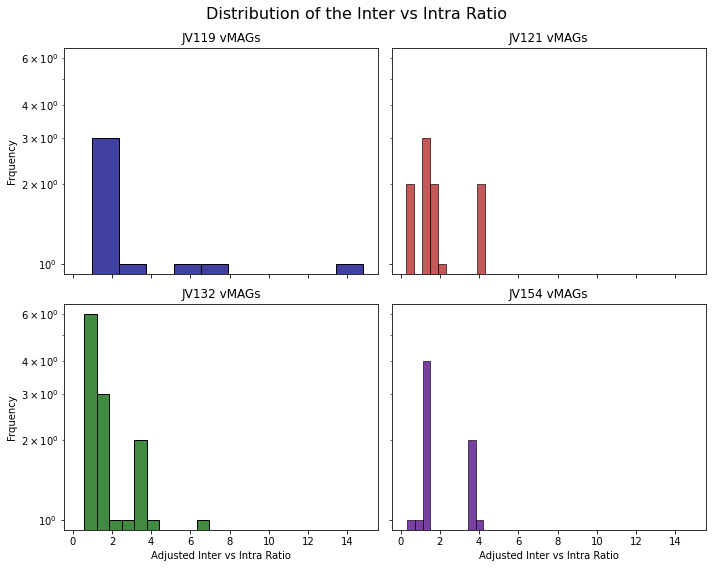

In [86]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vMAGs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vMAGs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vMAGs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout()

## Plots- Distribution of adjusted_inter_connective_linkage_density

Text(0.5, 0.98, 'JV119 Distribution of the Inter Linkage Density')

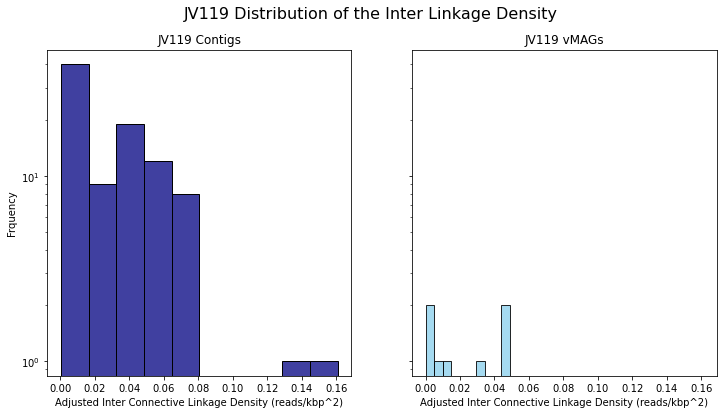

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='navy', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV119 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color='skyblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV119 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV119 Distribution of the Inter Linkage Density',fontsize=16)

Text(0.5, 0.98, 'JV119 Distribution of the Inter Linkage Density')

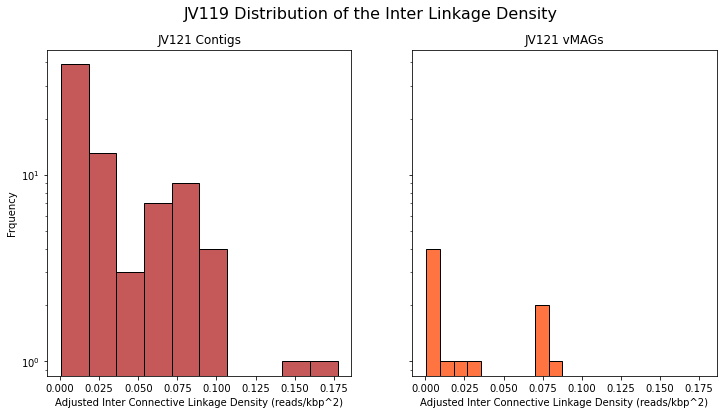

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='firebrick', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV121 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color='orangered', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV121 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV119 Distribution of the Inter Linkage Density',fontsize=16)

Text(0.5, 0.98, 'JV132 Distribution of the Inter Linkage Density')

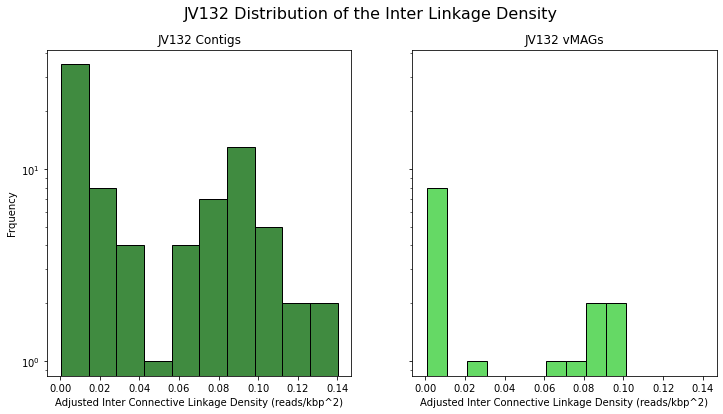

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='darkgreen', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV132 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color='limegreen', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV132 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV132 Distribution of the Inter Linkage Density',fontsize=16)

Text(0.5, 0.98, 'JV154 Distribution of the Inter Linkage Density')

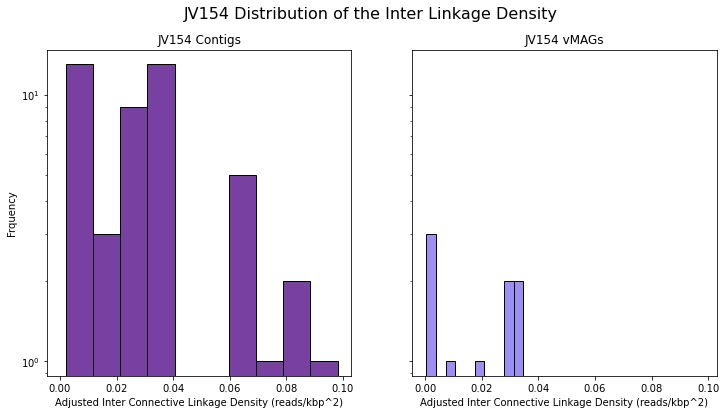

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[0], bins=10, color='indigo', edgecolor='black')
axes[0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0].set_ylabel('Frquency')
axes[0].set_title('JV154 Contigs')
axes[0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color='mediumslateblue', edgecolor='black', ax= axes[1])
axes[1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1].set_ylabel('Frquency')
axes[1].set_title('JV154 vMAGs')
axes[1].set_yscale('log')

fig.suptitle('JV154 Distribution of the Inter Linkage Density',fontsize=16)

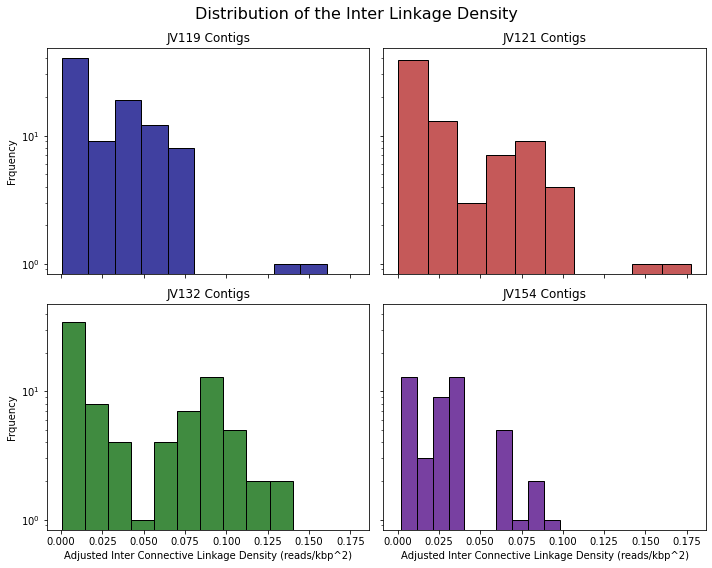

In [91]:
# plot all contigs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0,0], bins=10, color='navy', edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0,1], bins=10, color='firebrick', edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 Contigs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[1,0], bins=10, color='darkgreen', edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 Contigs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[1,1], bins=10, color='indigo', edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 Contigs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()


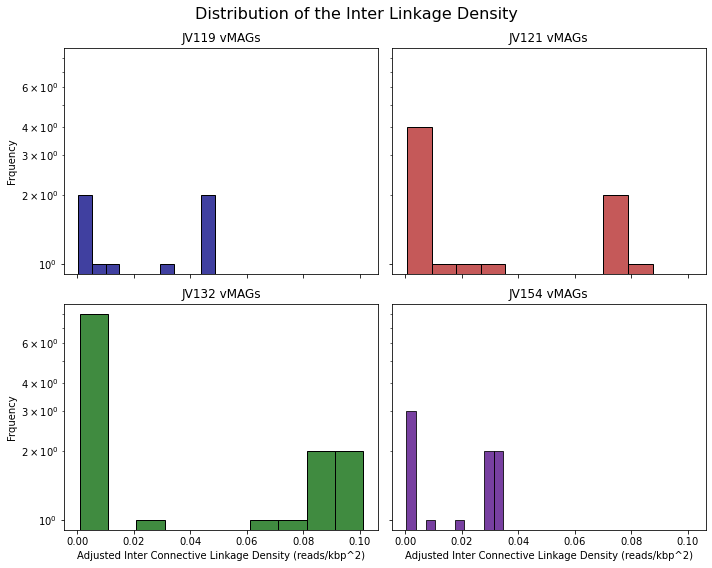

In [92]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color='navy', edgecolor='black', ax= axes[0,0])
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs')
axes[0,0].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color='firebrick', edgecolor='black', ax= axes[0,1])
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vMAGs')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color='darkgreen', edgecolor='black', ax= axes[1,0])
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vMAGs')
axes[1,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color='indigo', edgecolor='black', ax= axes[1,1])
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vMAGs')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

## Viral Copies per Cell

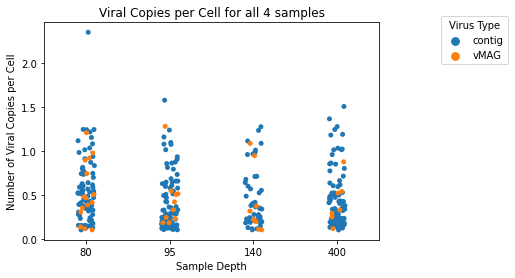

In [93]:
# create a jitterplot of vmag_assoc data frame with sample_depth on the x-axis, viral_copies_per_cell on the y-axis, and the data points colored by virus_type
sns.stripplot(x='sample_depth', y='viral_copies_per_cell', data=vmag_assoc, jitter=True, hue='virus_type')
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.title('Viral Copies per Cell for all 4 samples')
plt.legend(bbox_to_anchor=(1.4, 1.05),title='Virus Type')

Text(0.5, 1.0, 'vMAGs Boxplot of Viral Copies per Cell')

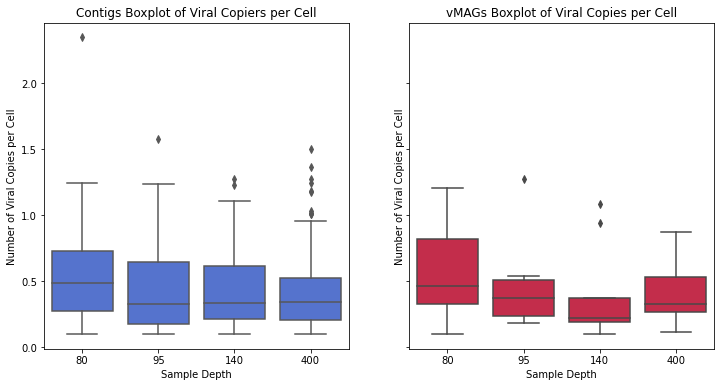

In [94]:
# create a data frame of only contigs by grouping vmag_assoc by virus_type and getting the group named 'contig'
contigs = vmag_assoc.groupby('virus_type', as_index=False).get_group('contig')

# create a dataframe of only vMAGs by grouping vmag_assoc by virus)type and getting the group named 'vMAG' 
vMAGs = vmag_assoc.groupby('virus_type', as_index=False).get_group('vMAG')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

# create a boxplot of contigs data frame with sample_depth on the x-axis, viral_copies_per_cell on the y-axis, and box color of royalblue as the first subplot
sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=contigs, color='royalblue', ax=axes[0])
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Number of Viral Copies per Cell')
axes[0].set_title('Contigs Boxplot of Viral Copiers per Cell')

# create a boxplot of vMAGs data frame with sample_depth on the x-axis, viral_copies_per_cell on the y-axis, and box color of crimson as the second subplot
sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=vMAGs, color='crimson', ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Number of Viral Copies per Cell')
axes[1].set_title('vMAGs Boxplot of Viral Copies per Cell')

## Number of Associated Viruses and the Total Number of vSAGs/vMAGs

In [95]:
# creata a data frame by grouping vmag_assoc by virus_type and getting the group vMAG
vmags = vmag_assoc.groupby('virus_type', as_index=False).get_group('vMAG')

# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame that counts the number of vMAGs for each sample depth
vmag_assoc_count = pd.DataFrame(vmags['sample_depth'].value_counts())

# rename the column sample_depth to count
vmag_assoc_count.rename(columns={'sample_depth': 'count'}, inplace=True)

# create a sample_depth column using the sample_depth list
vmag_assoc_count['sample_depth'] = sample_depth

# create a column named type
vmag_assoc_count['type'] = 'vMAGs connected to a Host'

# create a data frame that counts the number of total vmags using the length of each sample's dataframe
vmag_tot = pd.DataFrame([len(jv119_vmag_sum), len(jv121_vmag_sum), len(jv132_vmag_sum), len(jv154_vmag_sum)])

# rename first column
vmag_tot.rename(columns={0: 'count'}, inplace=True)

# merge sample_depth list as a data frame and vmag_tot 
vmag_tot = pd.DataFrame(pd.concat([vmag_tot,pd.DataFrame(sample_depth)],axis=1))

# rename first column
vmag_tot.rename(columns={0: 'sample_depth'}, inplace=True)

# create a column named type
vmag_tot['type'] = 'Total vMAGs'

# merge vmag_assoc_count and vmag_tot data frames
combo1 = pd.concat([vmag_assoc_count,vmag_tot])

Text(0.5, 1.0, 'Number of Total Viral MAGs per Sample')

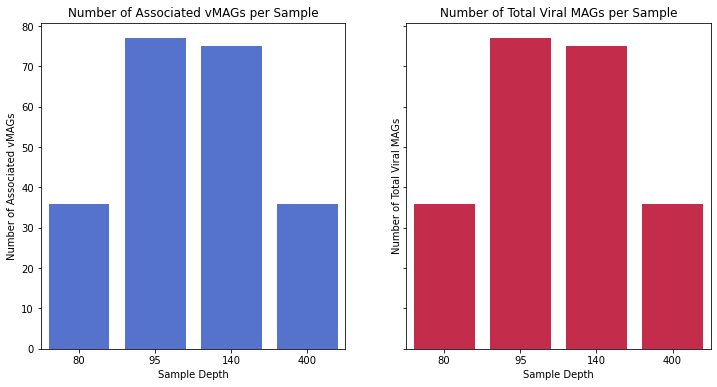

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='royalblue', ax=axes[0])
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Number of Associated vMAGs')
axes[0].set_title('Number of Associated vMAGs per Sample')

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='crimson', ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Number of Total Viral MAGs')
axes[1].set_title('Number of Total Viral MAGs per Sample')

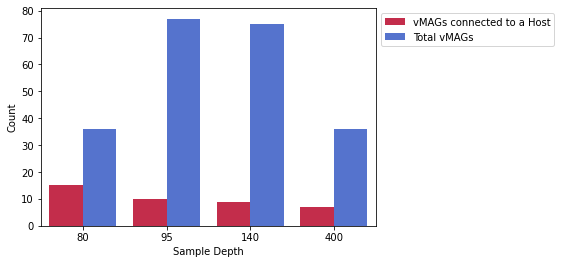

In [97]:
# create a custom color palette
custom_palette1 = ['crimson','royalblue']

# create a barplot of combo1 with sample_depth on the x-axis and count on the y-axis colored by the type column using the custom palette1
sns.barplot(x="sample_depth", y="count", hue="type", data=combo1, palette=custom_palette1)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1)) # set legend title and location outside of the plot

In [98]:
# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame counting how many sags at each depth
sag_assoc_count = pd.DataFrame(sag_sum['depth'].value_counts())

# rename depth column to count
sag_assoc_count.rename(columns={'depth': 'count'}, inplace=True)

# create a sample_depth column using sample_depth list
sag_assoc_count['sample_depth'] = sample_depth

# create a column named type
sag_assoc_count['type'] = 'vSAGs connected to a Host'

# create a data frame the counts the number of total sags at each depth
vsag_tot = pd.DataFrame([len(sag_gtdb[sag_gtdb['depth'] == 80]), len(sag_gtdb[sag_gtdb['depth'] == 95]), len(sag_gtdb[sag_gtdb['depth'] == 140]), len(sag_gtdb[sag_gtdb['depth'] == 400])])

# rename first column
vsag_tot.rename(columns={0: 'count'}, inplace=True)

# add sample depth column using the sample_depth list
vsag_tot = pd.DataFrame(pd.concat([vsag_tot,pd.DataFrame(sample_depth)],axis=1))

# rename fist column
vsag_tot.rename(columns={0: 'sample_depth'}, inplace=True)

# create a column named type
vsag_tot['type'] = 'Total vSAGs'

# merge sag_assoc_count and vsag_tot data frames
combo2 = pd.concat([sag_assoc_count,vsag_tot])

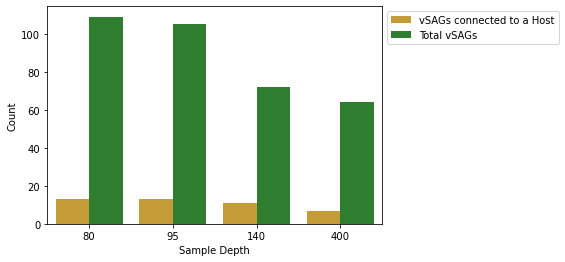

In [99]:
custom_palette2 = ['goldenrod','forestgreen']

sns.barplot(x="sample_depth", y="count", hue="type", data=combo2, palette=custom_palette2)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1))